Matplotlib Project
An NOAA dataset has been stored in the file data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv.
The data is froma subset of The National Centers for Environment Information(NCEI)_ Daily Global Historical Climatology network(GHCN-Daily). 

The GHCN-Daily is comprised of daily climatae records from thousands of land surface stations across the globe.

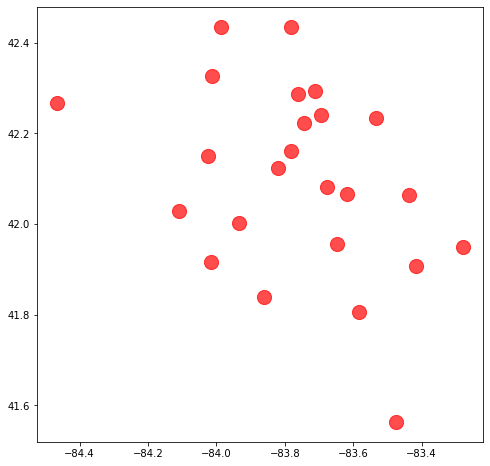

In [22]:
import plotly
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

df = pd.read_csv('BinSize_d400.csv')
hashid = "fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89"

station_locations_by_hash = df[df['hash'] == hashid]

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)


#if you do not see the above pics correctly the image is like below
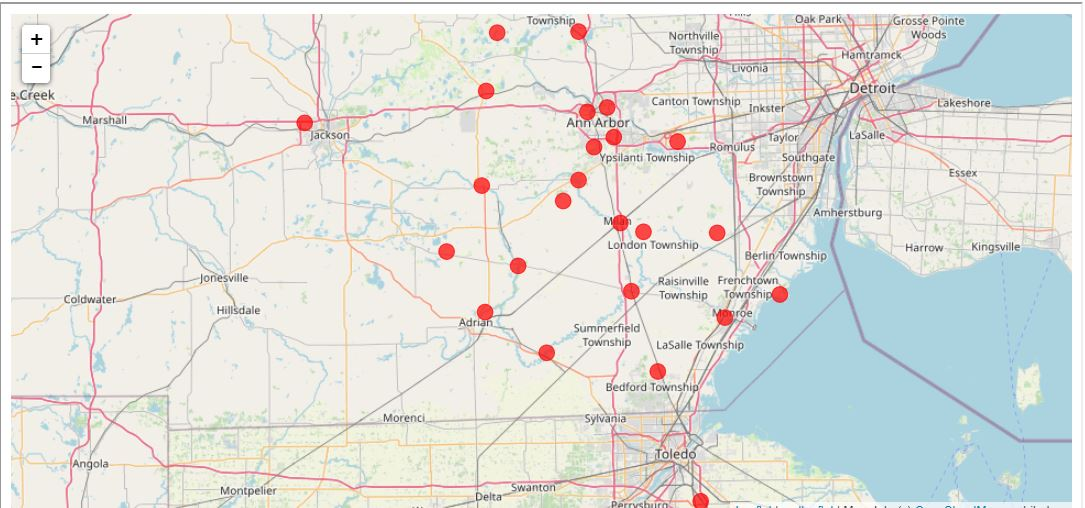

#Below is some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.
#The area between the record high and record low temperatures for each day should be shaded.

The variable information: 
id : station identification code
date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
element : indicator of element type
TMAX : Maximum temperature (tenths of degrees C)
TMIN : Minimum temperature (tenths of degrees C)
value : data value for element (tenths of degrees C)

In [37]:

from datetime import datetime
import numpy as np
import pandas as pd
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#create data only 2005-2014
df_new = df.where(df['Date'] < "2015-01-01").dropna()
#remove leap date
df_new['DateOnly']= df_new['Date'].str[5:]
df_new = df_new.where(df_new['Date'] != "02-29")
df_new['Data_Value']= df_new['Data_Value']/10

plt.figure()
#agg_high: max temp on that day.. agg_low: low temp
agg_high = df_new.groupby("DateOnly").agg({"Data_Value":np.max})
agg_low = df_new.groupby('DateOnly').agg({'Data_Value':np.min})
agg_reshape_high = agg_high.values.reshape(len(agg_high))
agg_reshape_low = agg_low.values.reshape(len(agg_low))


#organizing 2015 temp data
df_2015 = df.where(df['Date'] >= "2015-01-01").dropna()
df_2015['DateOnly']= df_2015['Date'].str[5:]
df_2015 = df_2015.where(df_2015['Date'] != "20-29")
df_2015['Data_Value']= df_2015['Data_Value']/10

df_2015_high = df_2015.groupby("DateOnly").agg({'Data_Value' :np.max})

df_2015_low = df_2015.groupby("DateOnly").agg({'Data_Value' :np.min})

#resetindex for merging two date ~2014 and 2015
agg_high_2014_reset = agg_high.reset_index()
agg_low_2014_reset = agg_low.reset_index()
agg_high_2015_reset = df_2015_high.reset_index()
agg_low_2015_reset = df_2015_low.reset_index()
alltime_high = pd.merge(agg_high_2014_reset, agg_high_2015_reset,  on='DateOnly')
alltime_low = pd.merge(agg_low_2014_reset, agg_low_2015_reset,  on='DateOnly')
#Find new breaking record temp among the years
new_high = alltime_high[alltime_high["Data_Value_y"]>alltime_high["Data_Value_x"]]
new_low =  alltime_low[alltime_low["Data_Value_y"]<alltime_low["Data_Value_x"]]
xval_high= new_high.index.tolist()
xval_low = new_low.index.tolist()

<Figure size 432x288 with 0 Axes>

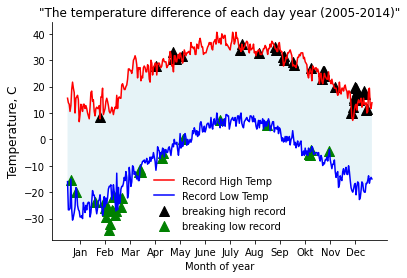

In [38]:

#graph
%matplotlib inline
plt.figure()
plt.plot(agg_high.values,  color='r', label = 'Record High Temp')

plt.plot(agg_low.values, color='b', label = 'Record Low Temp')

plt.xlabel('Month of year', fontsize= 10)
plt.ylabel('Temperature, C', fontsize= 12)
plt.title('"The temperature difference of each day year (2005-2014)"')

plt.gca().fill_between( range(len(agg_high)),
                       np.array(agg_reshape_high),
                       np.array(agg_reshape_low), facecolor='lightblue', alpha= 0.3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(xval_high, new_high['Data_Value_y'], marker ='^', s=100, color = 'black', label= "breaking high record")
plt.scatter(xval_low, new_low['Data_Value_y'], marker ='^', s=100, color = 'green',  label= "breaking low record")

#plt.legend(['High', 'Low'])
plt.legend(loc=8, frameon= False)
plt.gca().set_xticks(range(15,365,30))
plt.gca().set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Okt','Nov','Dec'], size=10)

plt.show()